### Load Required Libraries

In [786]:
import uproot
import pandas
pandas.set_option('display.max_rows', None)
import argparse
import awkward as ak 
import matplotlib 
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import numpy as np
from numpy import *
import mplhep as hep
from tqdm import trange
import random
import time 
import hist

### Open the minitree .root file and Examine the Output Arrays

In [846]:
minitree = uproot.open('/depot/cms/top/he614/HLLHC-FW/Top-Quark-Spin-Correlations/MiniTreeOutput/minitree_TT_Dilept_200.root')

In [788]:
#minitree['Step7'].keys()

In [789]:
#minitree['Step8'].keys()

In [790]:
#minitree['Step7'].arrays(['jet_pt'], library='pd')

In [791]:
#minitree['Step7'].arrays(["selection_step", "lep_pt", "lep_nearest_pt", "bjet_nearest_pt"] , library="pd")

In [792]:
#minitree['Step0'].arrays(filter_name="/gen_lep_(eta|phi|mass)_0/", library="pd")

In [793]:
#minitree['Step7'].arrays(filter_name="/(|gen_)lep_(pt|eta|phi|mass)/", library="pd")

In [794]:
#minitree['Step7'].arrays(filter_name="/(|gen_)lep(|_nearest)_(pt|eta|phi|mass)/", library="pd")

In [795]:
#minitree['Step8'].arrays(filter_name="/(|gen_)lep_(pt|eta|phi|mass)/", library="pd")

In [796]:
#len(minitree['Step7']['selection_step'].array())

In [855]:
len(minitree['Step8']['tt_mass'].array())

742

In [848]:
len(minitree['Step8']['gen_tt_mass'].array())

742

### Open the Histogram .root file

In [993]:
hist_out = uproot.open('/depot/cms/top/he614/HLLHC-FW/Top-Quark-Spin-Correlations/HistogramOutput/histogram_TT_Dilept_200.root')

In [994]:
names = hist_out.keys(filter_name="/rvg_/")
names_pure = [[] for n in range(len(names))]
for i in range(len(names)):
    names_pure[i] = names[i].strip('rvg_').strip(';1')

In [1001]:
names_pure

['lep_pt',
 'lep_eta',
 'lep_phi',
 'alep_pt',
 'alep_eta',
 'alep_phi',
 'met_pt',
 'met_phi',
 'b_pt',
 'b_eta',
 'b_phi',
 'ab_pt',
 'ab_eta',
 'ab_phi',
 'neu_pt',
 'neu_eta',
 'neu_phi',
 'aneu_pt',
 'aneu_eta',
 'aneu_phi',
 't_pt',
 't_eta',
 't_phi',
 't_rap',
 'at_pt',
 'at_eta',
 'at_phi',
 'at_rap',
 'tat_mass',
 'tat_pt',
 'tat_eta',
 'tat_phi',
 'tat_rap',
 'ckk',
 'crr',
 'cnn',
 'crk',
 'ckr',
 'cPrk',
 'cMrk',
 'c_hel',
 'll_deta',
 'll_dphi',
 'll_dr']

### Response Matrices

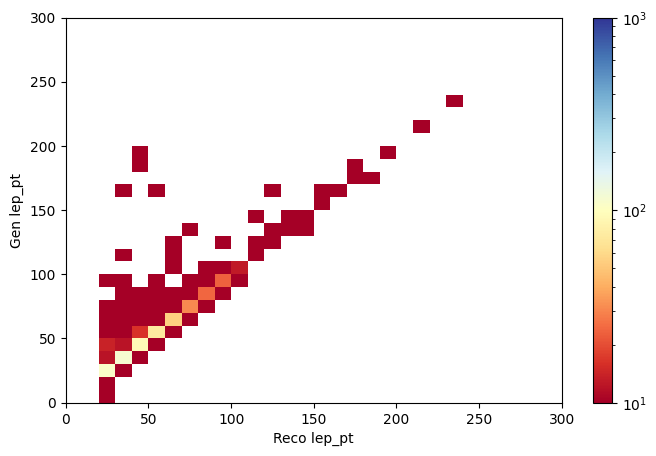

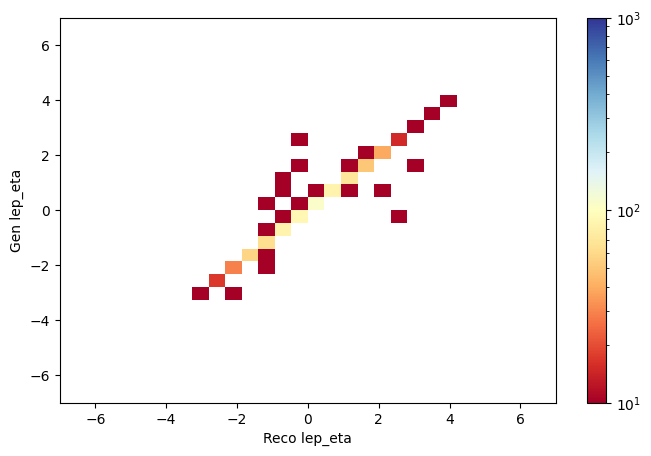

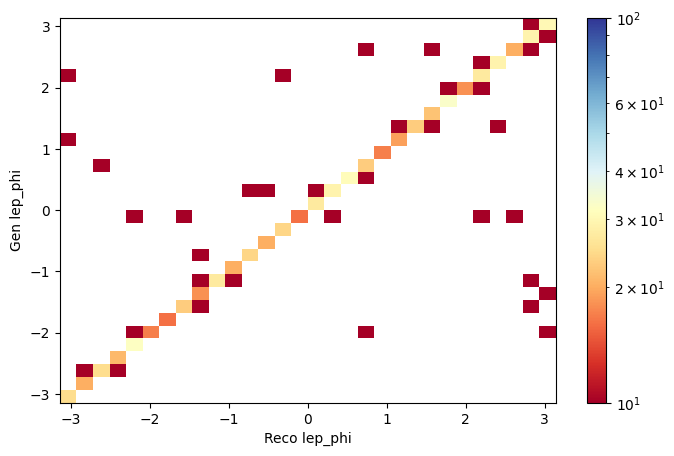

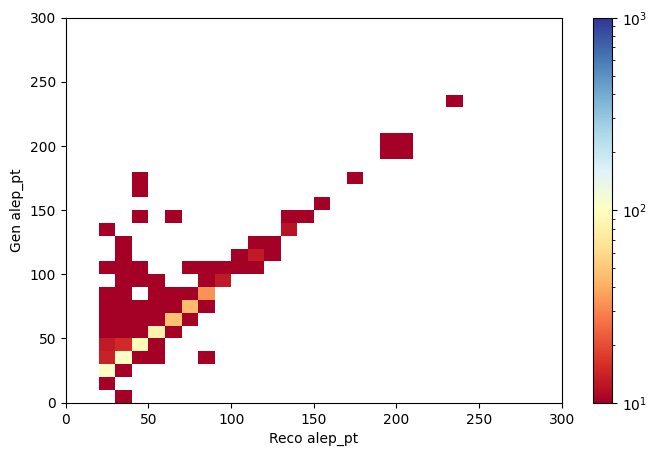

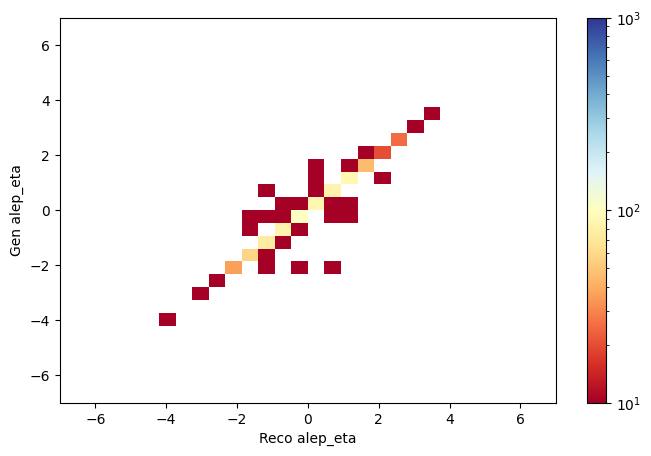

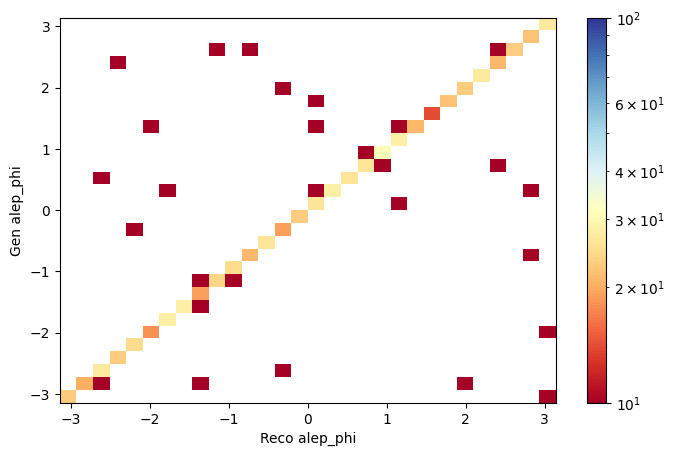

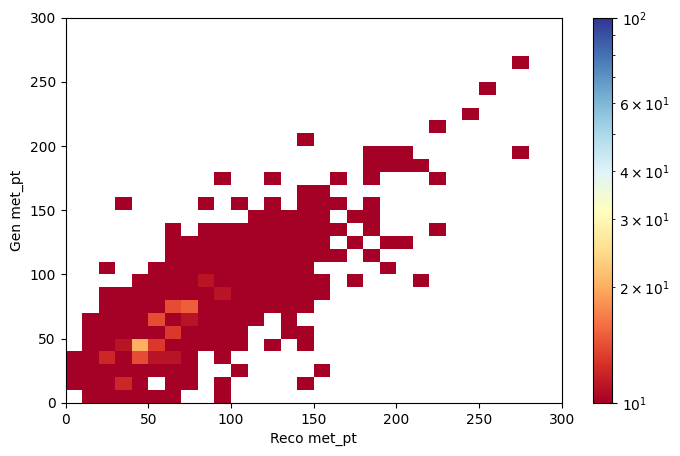

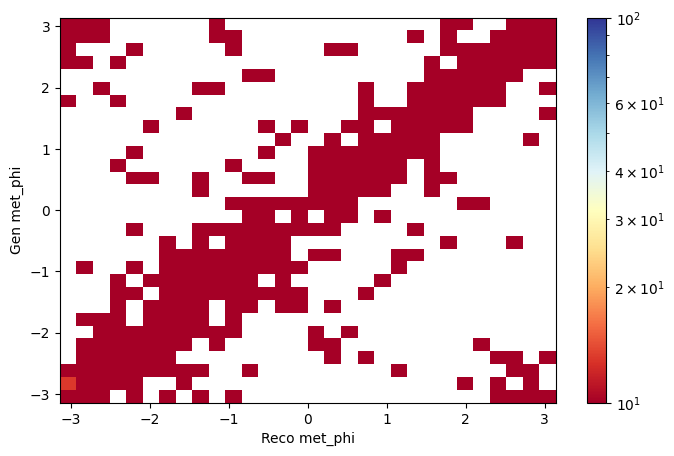

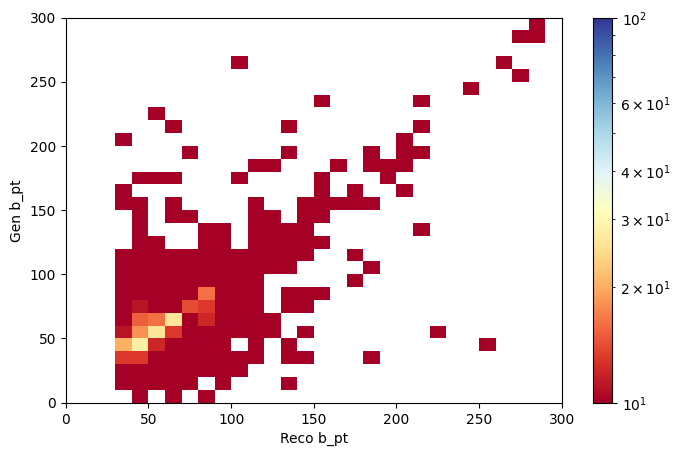

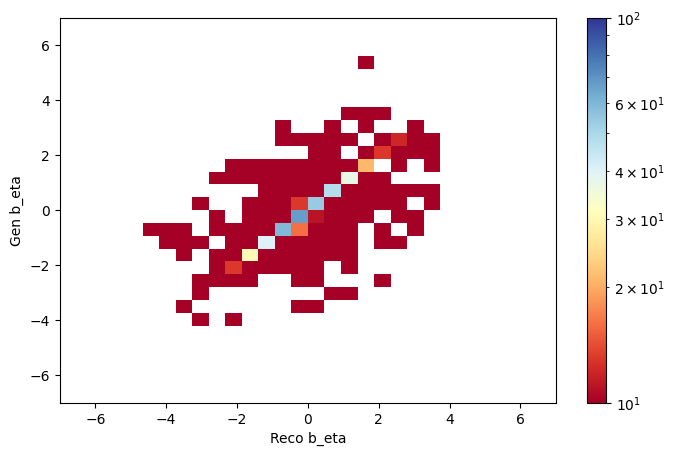

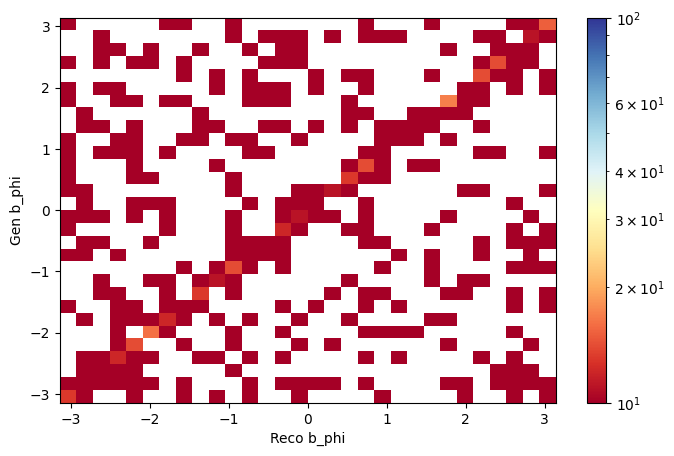

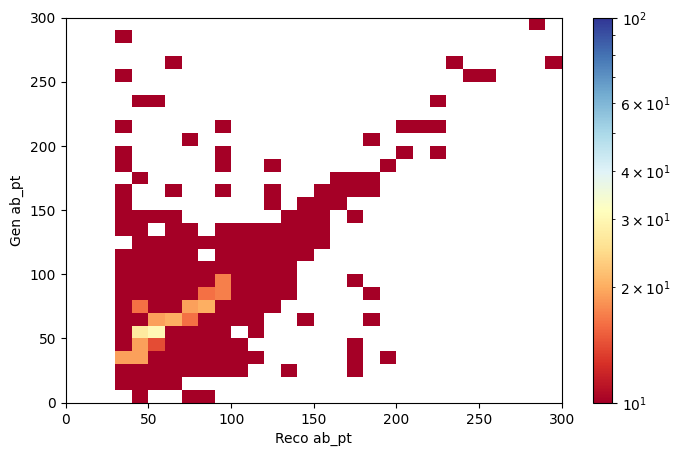

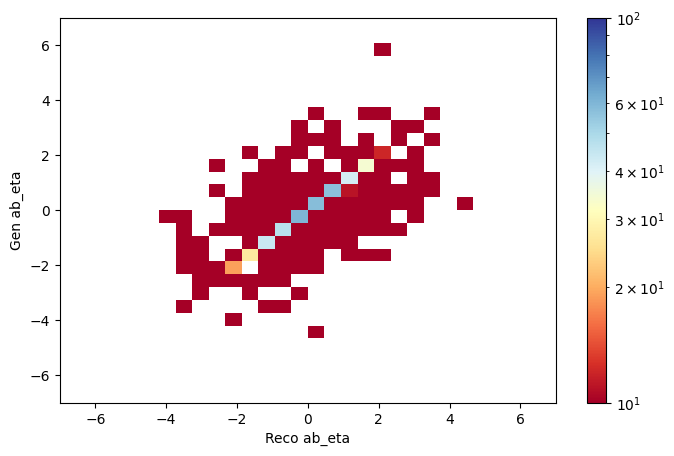

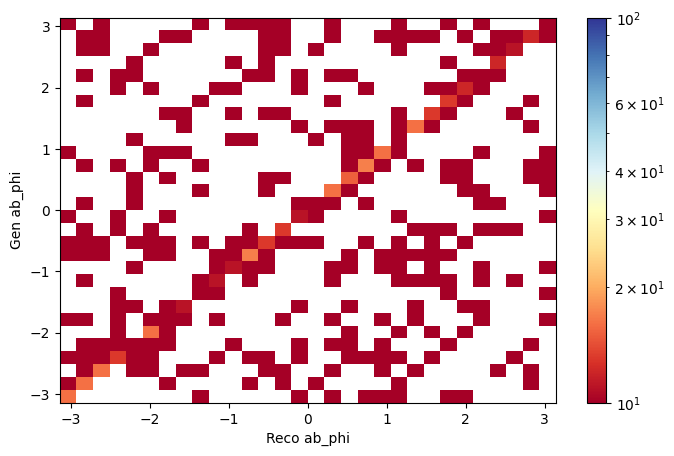

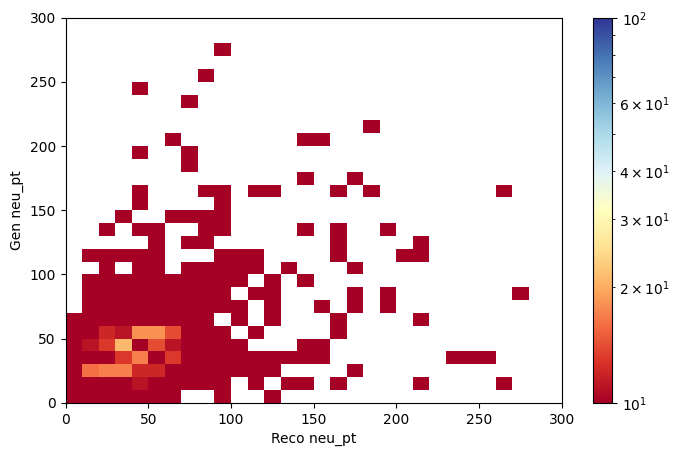

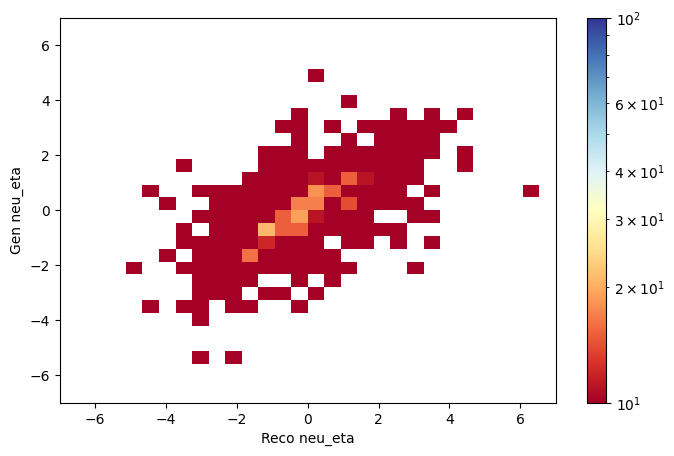

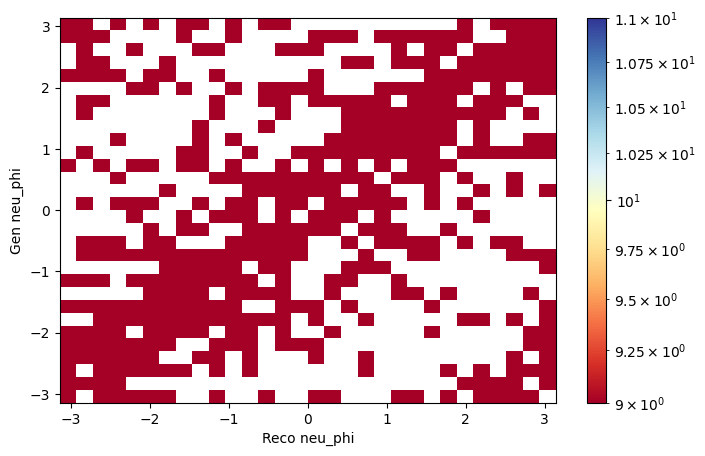

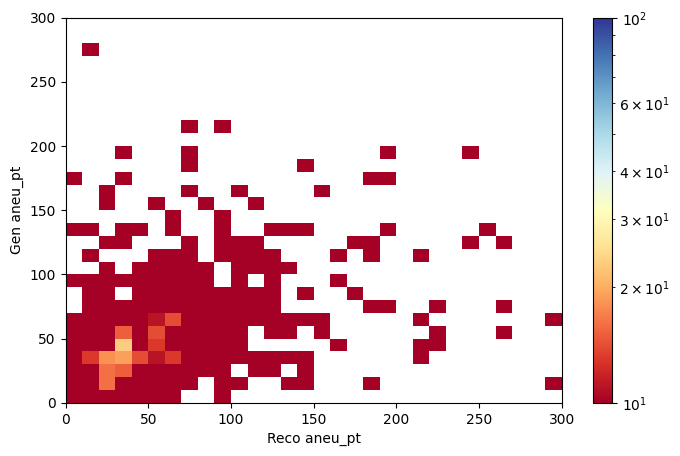

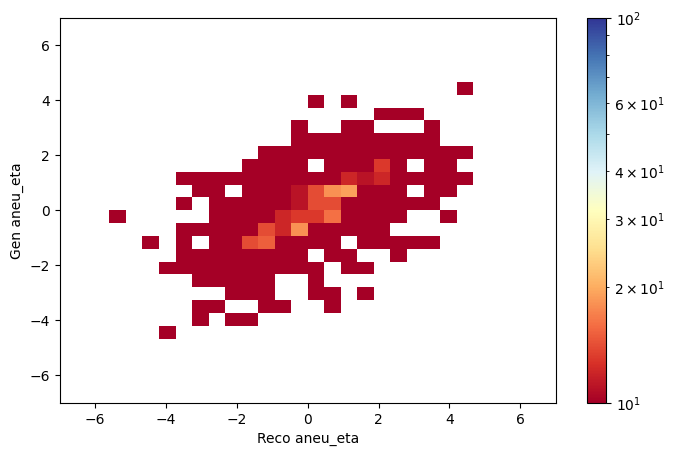

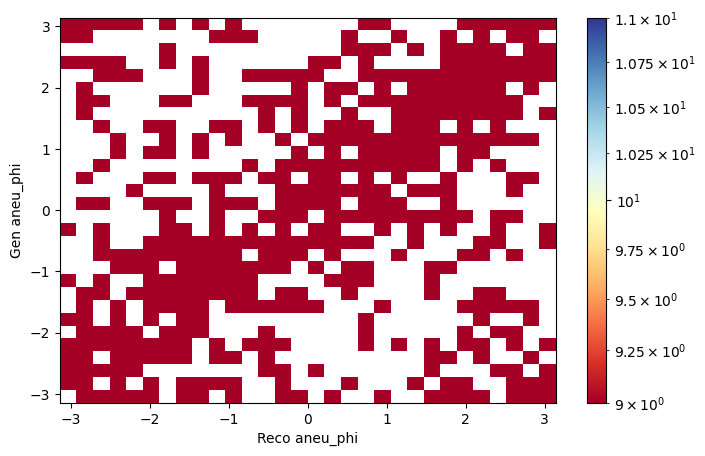

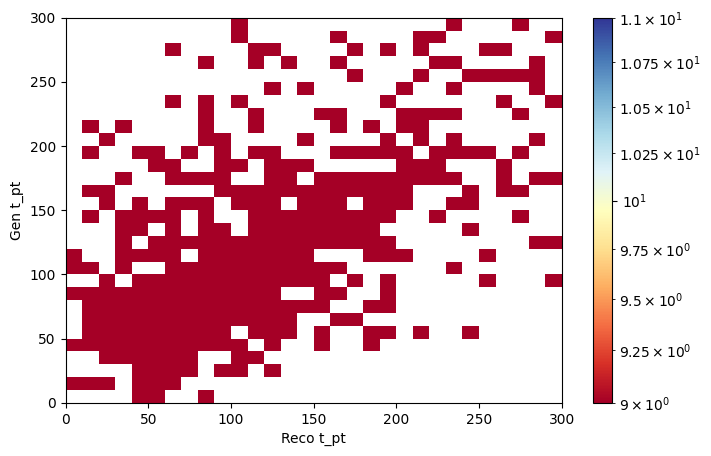

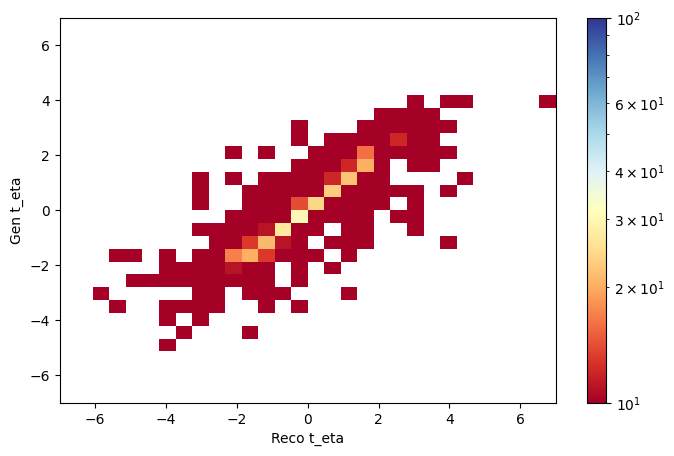

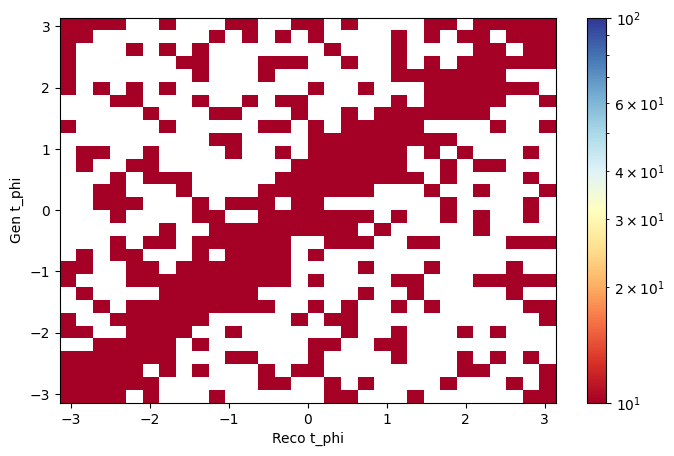

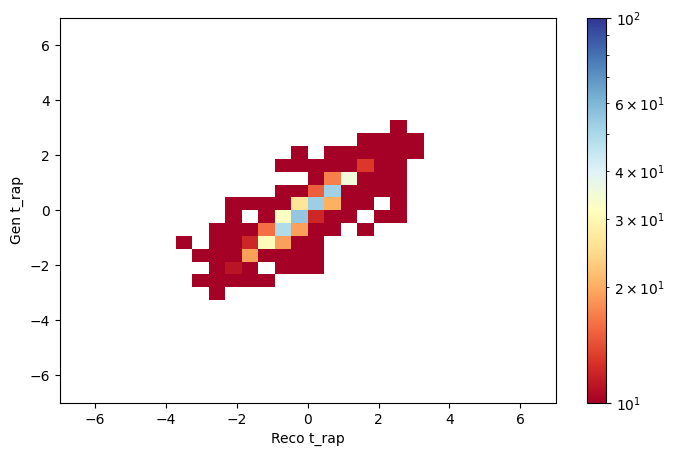

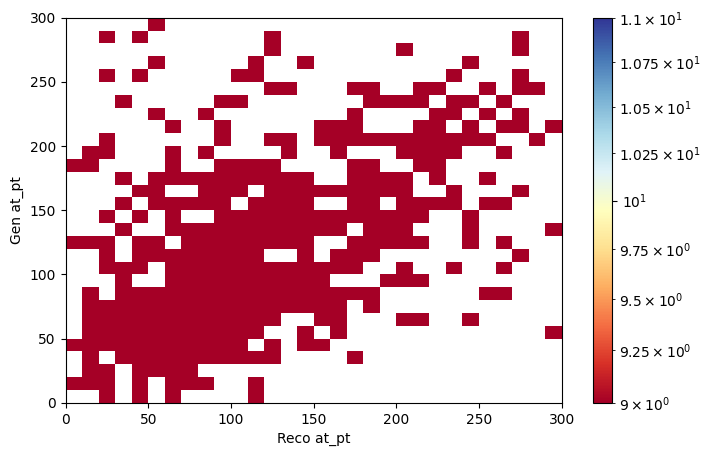

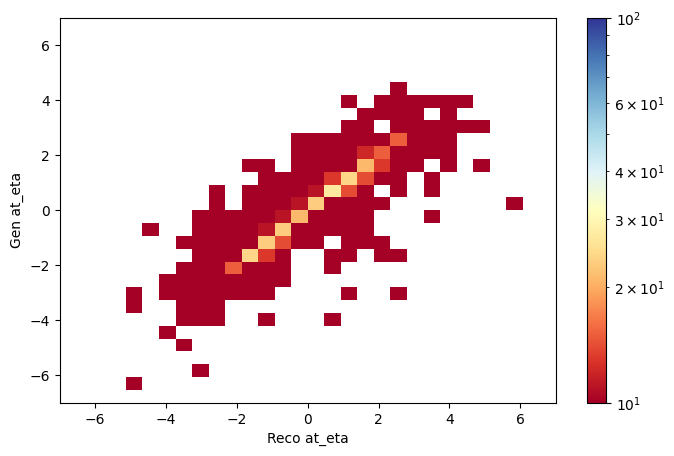

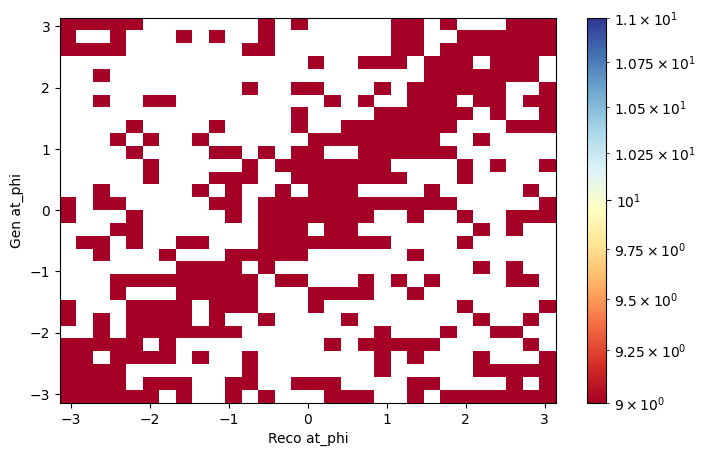

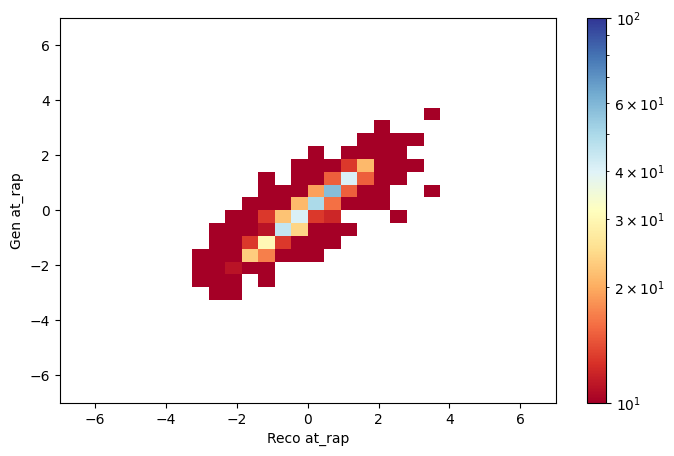

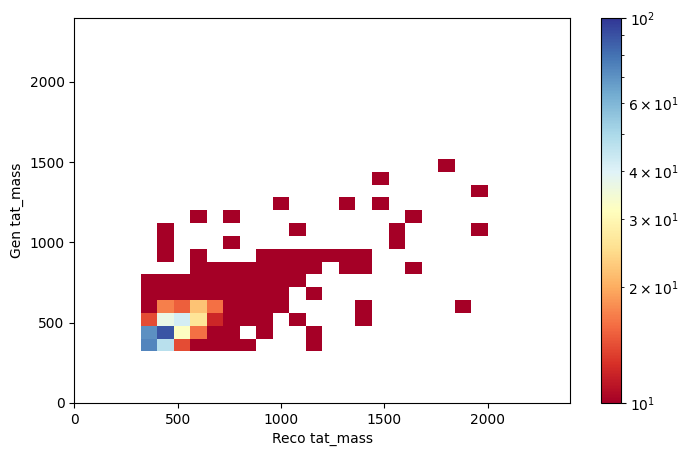

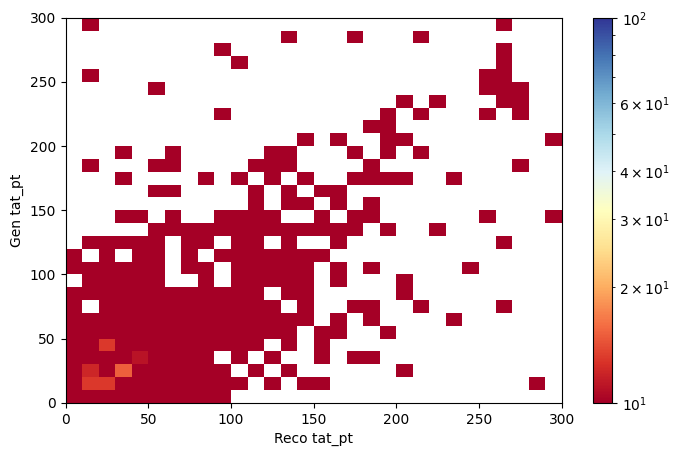

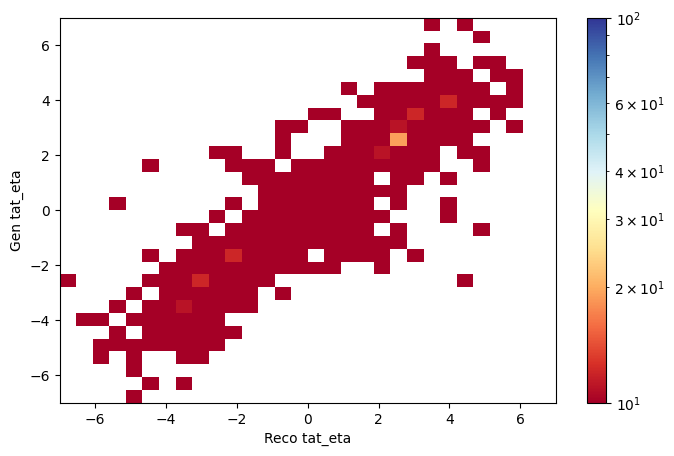

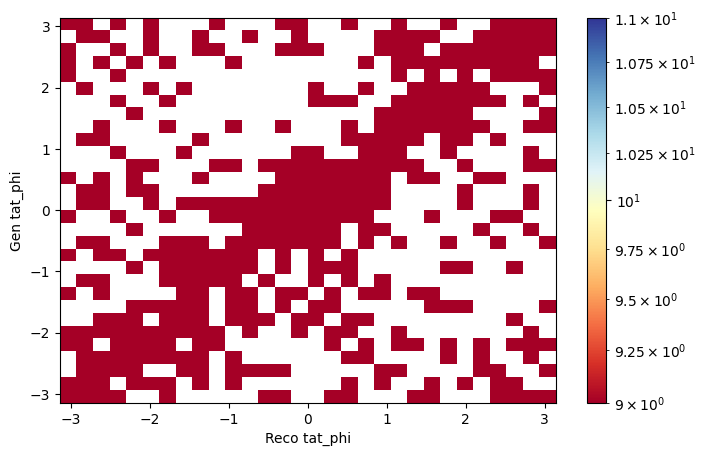

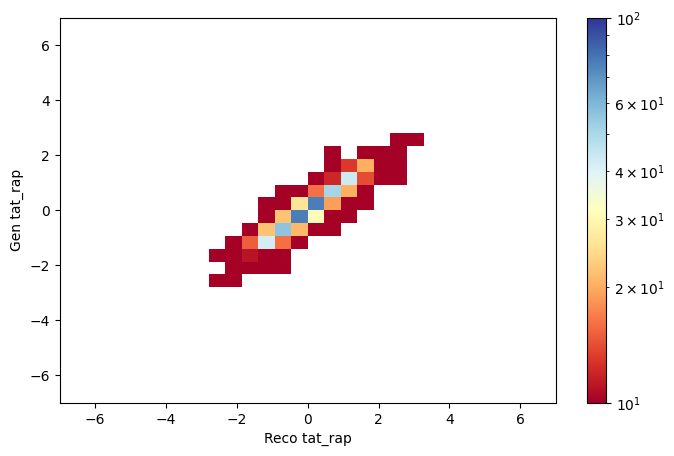

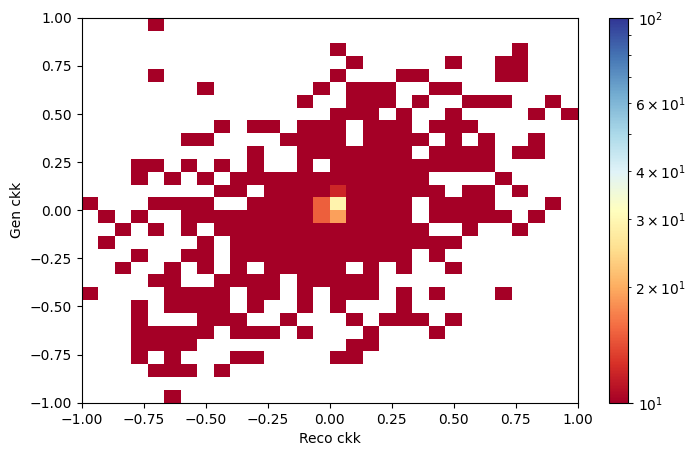

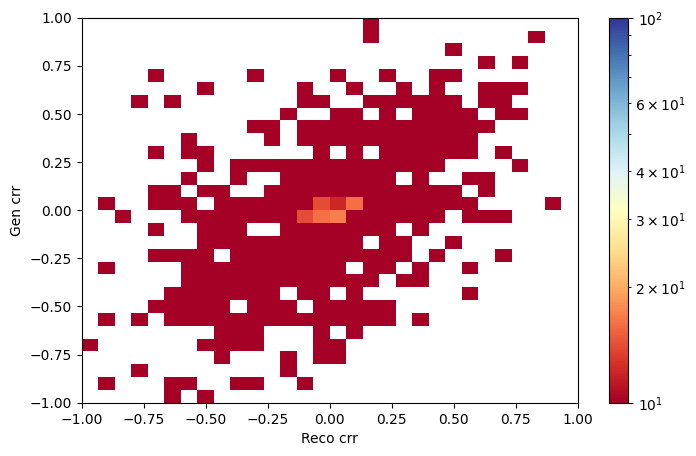

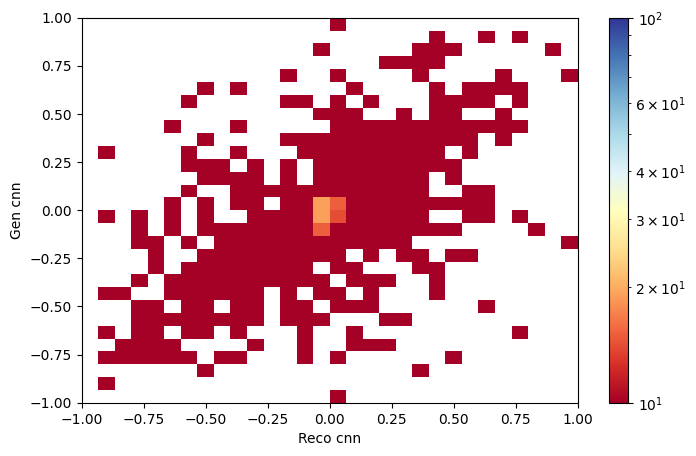

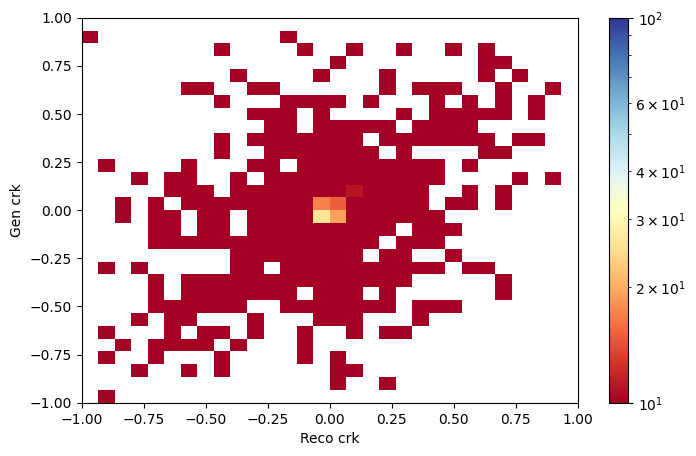

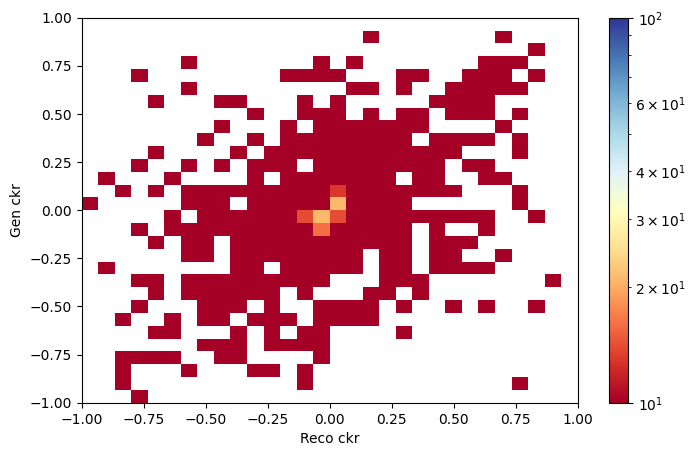

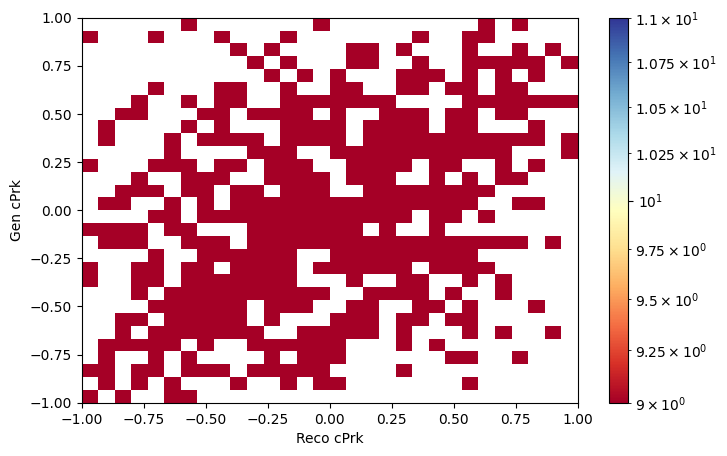

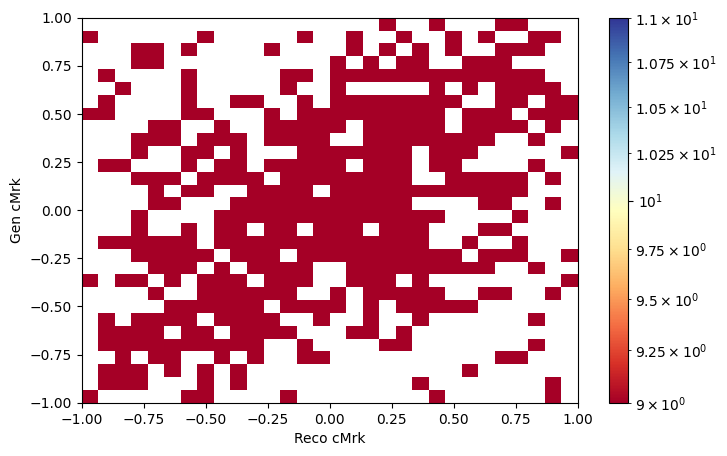

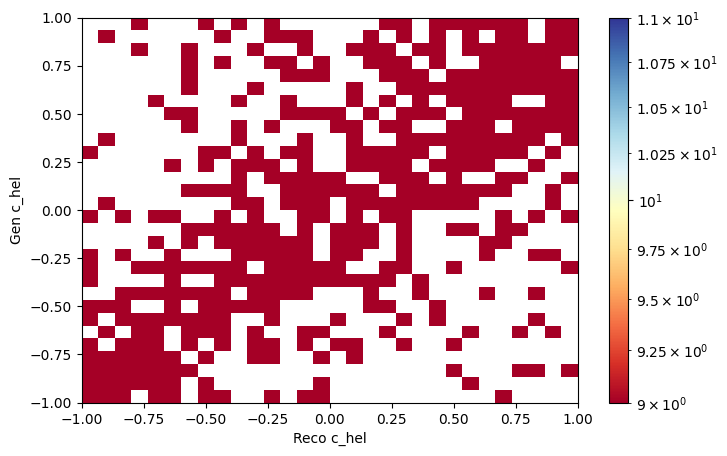

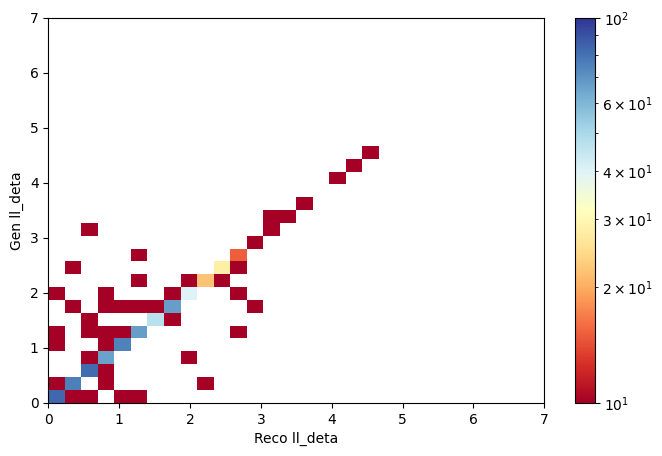

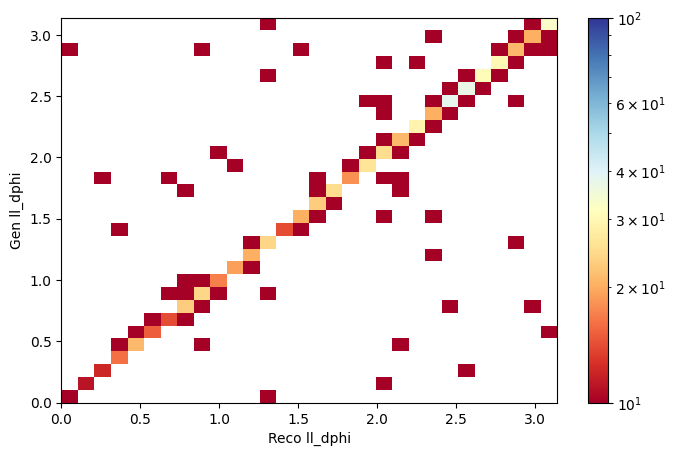

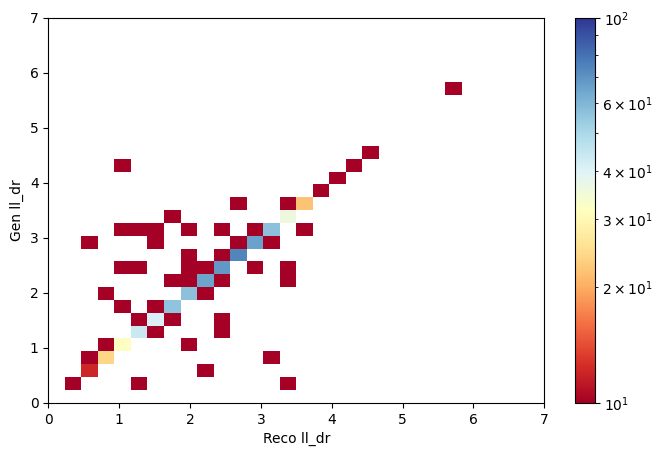

In [859]:
for i in range(len(names)):
    h = hist_out[names[i]].to_hist()
    fig_rvg, ax_rvg = plt.subplots(figsize=(8, 5))
    w_rvg, x_rvg, y_rvg = h.to_numpy()
    levels = np.logspace(len(str(round(w_rvg.min()))), len(str(round(w_rvg.max()))))
    mesh_rvg = ax_rvg.pcolormesh(x_rvg, y_rvg, w_rvg.T, cmap="RdYlBu", norm=colors.LogNorm(vmin=levels.min(), vmax=levels.max()))
    ax_rvg.set_xlabel("Reco "+names_pure[i])
    ax_rvg.set_ylabel("Gen "+names_pure[i])
    
    fig_rvg.colorbar(mesh_rvg)
    plt.show()

### Alternative Contour Option

(ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f2481b2f910>, cbar=None, text=[]),
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f2482c4c100>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)],
 [StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f247e36ccd0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)])

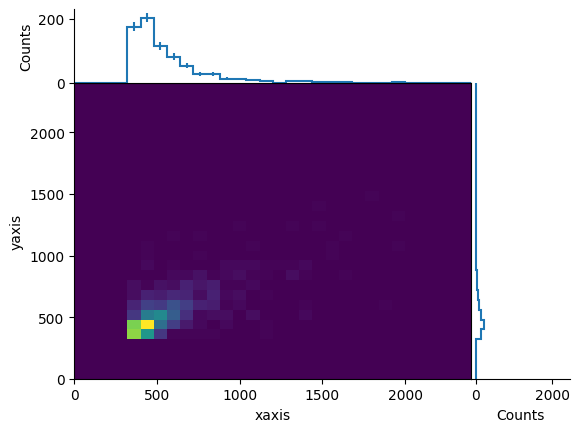

In [860]:
hist_out['rvg_tat_mass'].to_hist().plot2d_full()

### Acceptance $\times$ Effeciency with the Make_minitree_v2.py
Please check the equivalenteff_cut.cc to generate these. 

In [987]:
h1 = hist_out['lep_pt'].to_hist()

In [988]:
h2 = hist_out['all_gen_lep_pt'].to_hist()

In [989]:
h1

Hist(Regular(30, 0, 300, name='xaxis'), storage=Double()) # Sum: 741.0 (742.0 with flow)

In [990]:
h2

Hist(Regular(30, 0, 300, name='xaxis'), storage=Double()) # Sum: 9343.0 (10192.0 with flow)

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f24819a4130>, errorbar=None, legend_artist=None)]

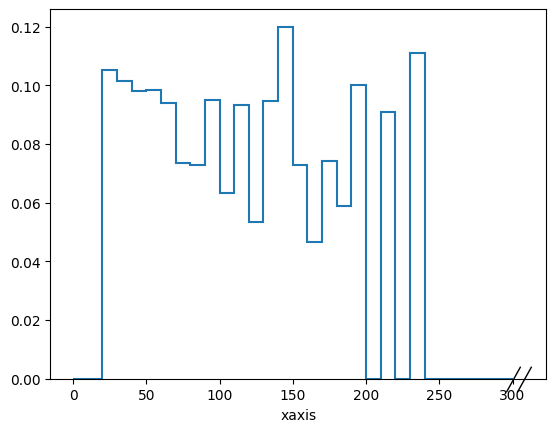

In [991]:
(h1/h2).plot()

In [945]:
(h1/h2).to_numpy()[0]

array([0.        , 0.        , 0.10522696, 0.10133709, 0.09810387,
       0.09850107, 0.09383378, 0.07364341, 0.07286432, 0.09493671,
       0.06334842, 0.09333333, 0.05343511, 0.09473684, 0.12      ,
       0.07272727, 0.04651163, 0.07407407, 0.05882353, 0.1       ,
       0.        , 0.09090909, 0.        , 0.11111111, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

In [946]:
(h1/h2).to_numpy()[1]

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
       220., 230., 240., 250., 260., 270., 280., 290., 300.])

In [1039]:
gen_names = hist_out.keys(filter_name="/gen/") #t_pt

In [1040]:
reco_names = [[] for n in range(len(gen_names))]
for i in range(len(gen_names)):
    reco_names[i] = gen_names[i].strip("gen").strip(";1").strip("_")

In [1041]:
reco_names

['lep_pt',
 'lep_eta',
 'lep_phi',
 'alep_pt',
 'alep_eta',
 'alep_phi',
 'met_pt',
 'met_phi',
 'b_pt',
 'b_eta',
 'b_phi',
 'ab_pt',
 'ab_eta',
 'ab_phi',
 'neu_pt',
 'neu_eta',
 'neu_phi',
 'aneu_pt',
 'aneu_eta',
 'aneu_phi',
 't_pt',
 't_eta',
 't_phi',
 't_rap',
 'at_pt',
 'at_eta',
 'at_phi',
 'at_rap',
 'tat_mass',
 'tat_pt',
 'tat_eta',
 'tat_phi',
 'tat_rap',
 'ckk',
 'crr',
 'cnn',
 'crk',
 'ckr',
 'cP_rk',
 'cM_rk',
 'c_hel',
 'll_deta',
 'll_dphi',
 'll_dr']

(array([[0.0000e+00, 0.0000e+00, 1.5300e+02, 1.4400e+02, 1.1900e+02,
         9.2000e+01, 7.0000e+01, 3.8000e+01, 2.9000e+01, 3.0000e+01,
         1.4000e+01, 1.4000e+01, 7.0000e+00, 9.0000e+00, 9.0000e+00,
         4.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 2.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.0192e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 

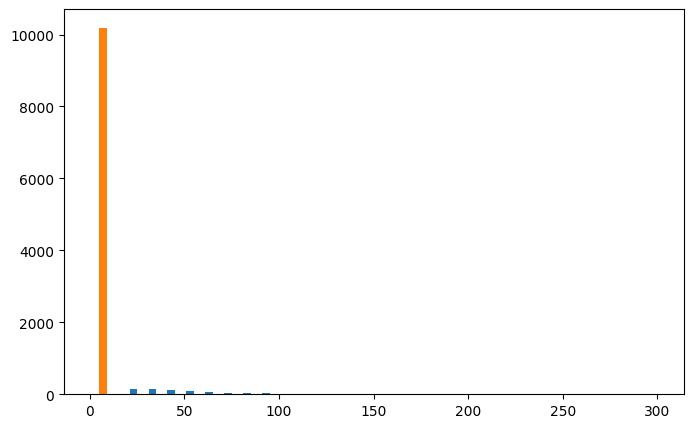

In [1009]:
h_reco = minitree['Step8'][reco_names[0]].array()
h_gen = minitree['Step0']['gen_top_pt_0'].array()
bins = hist_out[reco_names[0]].to_numpy()[1]
fig_rvg, ax_rvg = plt.subplots(figsize=(8, 5))

#ax_rvg.hist(h_gen)
ax_rvg.hist([h_reco, h_gen], bins)
#
#plt.show()

In [1056]:
for i in range(len(hist_out.keys(filter_name="/all/"))):
    print(hist_out.keys(filter_name="/all/")[i].strip("all_").strip(";1").strip("gen").strip("_"))

lep_pt
lep_eta
lep_phi
alep_pt
alep_eta
alep_phi
met_pt
met_phi
top_pt
top_eta
top_phi
atop_pt
atop_eta
atop_phi
b_pt
b_eta
b_phi
ab_pt
ab_eta
ab_phi
neu_pt
neu_eta
neu_phi
aneu_pt
aneu_eta
aneu_phi


In [1058]:
for i in range(len(hist_out.keys(filter_name="/all/"))):
    h_reco = minitree['Step8'][hist_out.keys(filter_name="/all/")[i].strip("all_").strip(";1").strip("gen").strip("_")].array()
    h_gen = minitree['Step0'][hist_out.keys()[i].strip("all_").strip(";1")+"_0"].array()
    bins = hist_out[hist_out.keys()[i].strip("all_").strip(";1")+"_0"].to_numpy()[1]
    fig_rvg, ax_rvg = plt.subplots(figsize=(8, 5))
    
    #ax_rvg.hist(h_gen)
    ax_rvg.hist([h_reco, h_gen], bins, label=[hist_out.keys()[i].strip("all_").strip(";1")+"_0", "Counts"])
    plt.show()

KeyInFileError: not found: 'gen_lep_pt_0' (with any cycle number)

    Available keys: 'gen_lep_pt;1', 'gen_alep_pt;1', 'gen_lep_eta;1', 'gen_lep_phi;1', 'all_gen_lep_pt;1', 'lep_pt;1', 'gen_alep_eta;1', 'gen_alep_phi;1', 'gen_met_pt;1', 'gen_b_pt;1', 'gen_neu_pt;1', 'gen_t_pt;1', 'rvg_lep_pt;1'...

in file /depot/cms/top/he614/HLLHC-FW/Top-Quark-Spin-Correlations/HistogramOutput/histogram_TT_Dilept_200.root